# Componente como Serviço

## Passo 2 - Componente a partir do Workflow

In [6]:
import iplantuml

Writing output for /home/santanche/git/component2learn/notebooks/ai/cancer/192a1f48-2bb5-4e6c-ac64-947693e3366a.uml to 192a1f48-2bb5-4e6c-ac64-947693e3366a.svg


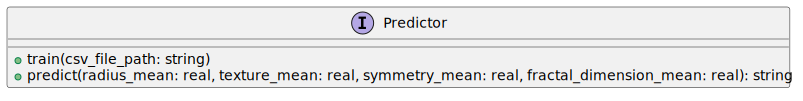

In [7]:
%%plantuml

@startuml

interface Predictor {
  + train(csv_file_path: string)
  + predict(radius_mean: real, texture_mean: real, symmetry_mean: real, fractal_dimension_mean: real): string
}

@enduml

Writing output for /home/santanche/git/component2learn/notebooks/ai/cancer/86dda1d6-0f1a-419c-808b-7ba6b8a1276f.uml to 86dda1d6-0f1a-419c-808b-7ba6b8a1276f.svg


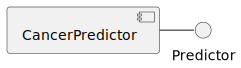

In [8]:
%%plantuml

@startuml

[CancerPredictor] - Predictor

@enduml

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

class CancerPredictor:
    def __init__(self):
        self.model = LogisticRegression()
        self.le_diagnosis = LabelEncoder()

    def train(self, csv_file_path):
        # Load the data
        data = pd.read_csv(csv_file_path)

        # Encode categorical variables
        data['diagnosis'] = self.le_diagnosis.fit_transform(data['diagnosis'])

        # Split features and target
        X = data[['radius_mean', 'texture_mean', 'symmetry_mean', 'fractal_dimension_mean']]

        y = data['diagnosis']

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        self.model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model accuracy: {accuracy:.2f}")

    def predict(self, radius_mean, texture_mean, symmetry_mean, fractal_dimension_mean):
        # Create a DataFrame with the same feature names as the training data
        input_data = pd.DataFrame([[radius_mean, texture_mean, symmetry_mean, fractal_dimension_mean]],
                                  columns=['radius_mean', 'texture_mean', 'symmetry_mean', 'fractal_dimension_mean'])

        # Make prediction
        prediction = self.model.predict(input_data)

        # Decode prediction
        diagnosis = self.le_diagnosis.inverse_transform(prediction)[0]

        return diagnosis

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Create an instance of the predictor
predictor = CancerPredictor()

# Train the model
#################

# Load the data
data = pd.read_csv("breast-cancer-wisconsin.csv")

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the train data to a temporary CSV file
train_data.to_csv("breast-cancer-wisconsin_train.csv", index=False)

# Train the model using the train data
predictor.train("breast-cancer-wisconsin_train.csv")

# Use the model
###############

# Loop through each row in the test data and make predictions
for index, row in test_data.iterrows():
  radius_mean = row['radius_mean']
  texture_mean = row['texture_mean']
  symmetry_mean = row['symmetry_mean']
  fractal_dimension_mean = row['fractal_dimension_mean']

  # Make the prediction
  predicted_diagnosis = predictor.predict(radius_mean, texture_mean, symmetry_mean, fractal_dimension_mean)

  # Print the result for each row
  print(f"For a person with radius_mean {radius_mean}, texture_mean {texture_mean}, symmetry_mean {symmetry_mean}, and fractal_dimension_mean {fractal_dimension_mean}:")

# Evaluate the model
####################

# Collect predictions and true labels
y_true = test_data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).tolist()
y_pred = test_data.apply(lambda row: 1 if predictor.predict(row['radius_mean'], row['texture_mean'], row['symmetry_mean'], row['fractal_dimension_mean']) == 'M' else 0, axis=1).tolist()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Model accuracy: 0.90
For a person with radius_mean 12.47, texture_mean 18.6, symmetry_mean 0.1925, and fractal_dimension_mean 0.06373:
For a person with radius_mean 18.94, texture_mean 21.31, symmetry_mean 0.1582, and fractal_dimension_mean 0.05461:
For a person with radius_mean 15.46, texture_mean 19.48, symmetry_mean 0.1931, and fractal_dimension_mean 0.05796:
For a person with radius_mean 12.4, texture_mean 17.68, symmetry_mean 0.1811, and fractal_dimension_mean 0.07102:
For a person with radius_mean 11.54, texture_mean 14.44, symmetry_mean 0.1818, and fractal_dimension_mean 0.06782:
For a person with radius_mean 20.6, texture_mean 29.33, symmetry_mean 0.2397, and fractal_dimension_mean 0.07016:
For a person with radius_mean 22.01, texture_mean 21.9, symmetry_mean 0.1824, and fractal_dimension_mean 0.0614:
For a person with radius_mean 17.57, texture_mean 15.05, symmetry_mean 0.1739, and fractal_dimension_mean 0.06149:
For a person with radius_mean 13.34, texture_mean 15.86, symmetr